# seaborn.lmplot
---

Seaborn's `lmplot` is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables. Logistic regression for binary classification is also supported with `lmplot`.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
np.random.seed(sum(map(ord,'lmplot')))

In [2]:
# Generate some random data for 2 imaginary classes of points
n = 256
sigma = 15
x = range(n)
y = range(n) + sigma*np.random.randn(n)
category1 = np.round(np.random.rand(n))
category2 = np.round(np.random.rand(n))
df = pd.DataFrame({'x':x,
                   'y':y,
                   'category1':category1,
                   'category2':category2})
df.loc[df.category1==1, 'y'] *= 2

Basic plot

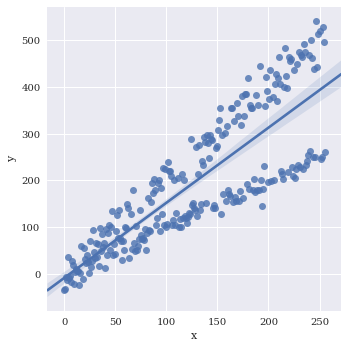

In [3]:
sns.lmplot(data=df,
           x='x',
           y='y')

Color by species

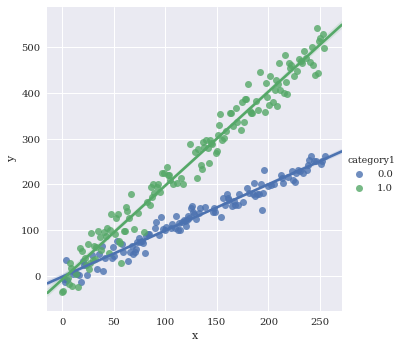

In [4]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='category1')

Facet the categorical variables using `col` and/or `row`

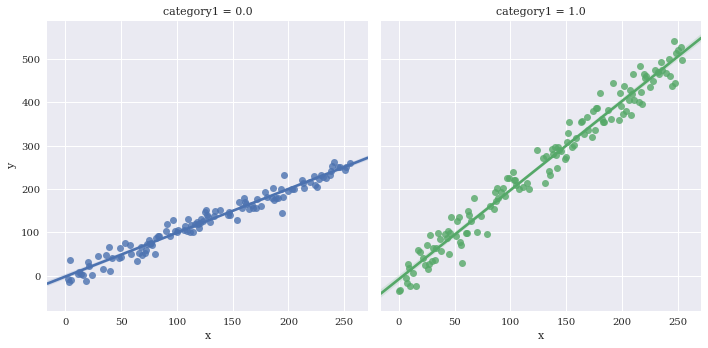

In [5]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='category1',
           col='category1')

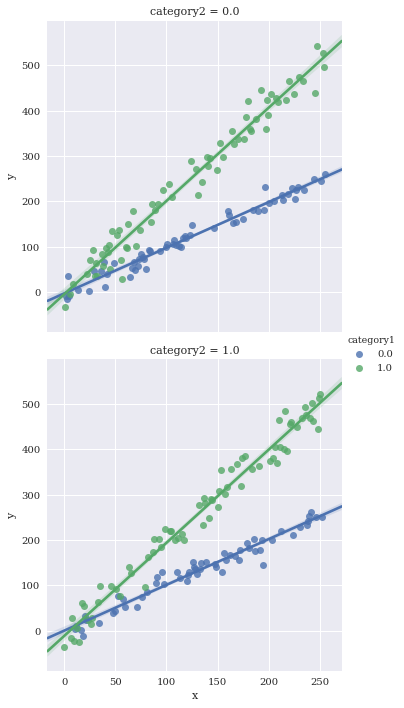

In [6]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='category1',
           row='category2')

Facet against two variables simultaneously

Make a new variable to uniquely color the four different combinations

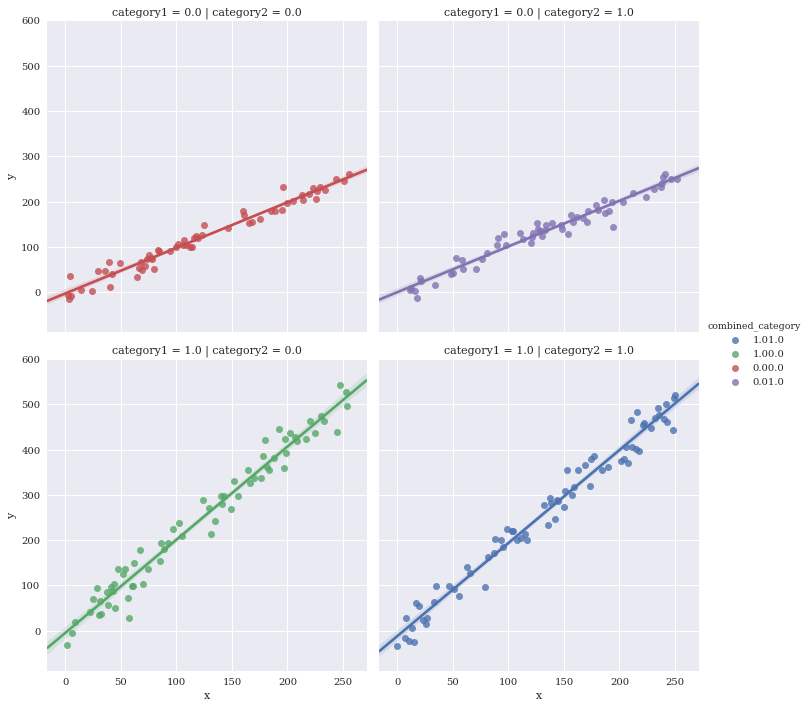

In [7]:
df['combined_category'] = df.category1.map(str) +  df.category2.map(str)
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='combined_category',
           row='category1',
           col='category2')

Manually specify a maximum number of columns and let Seaborn automatically wrap with `col_wrap`.

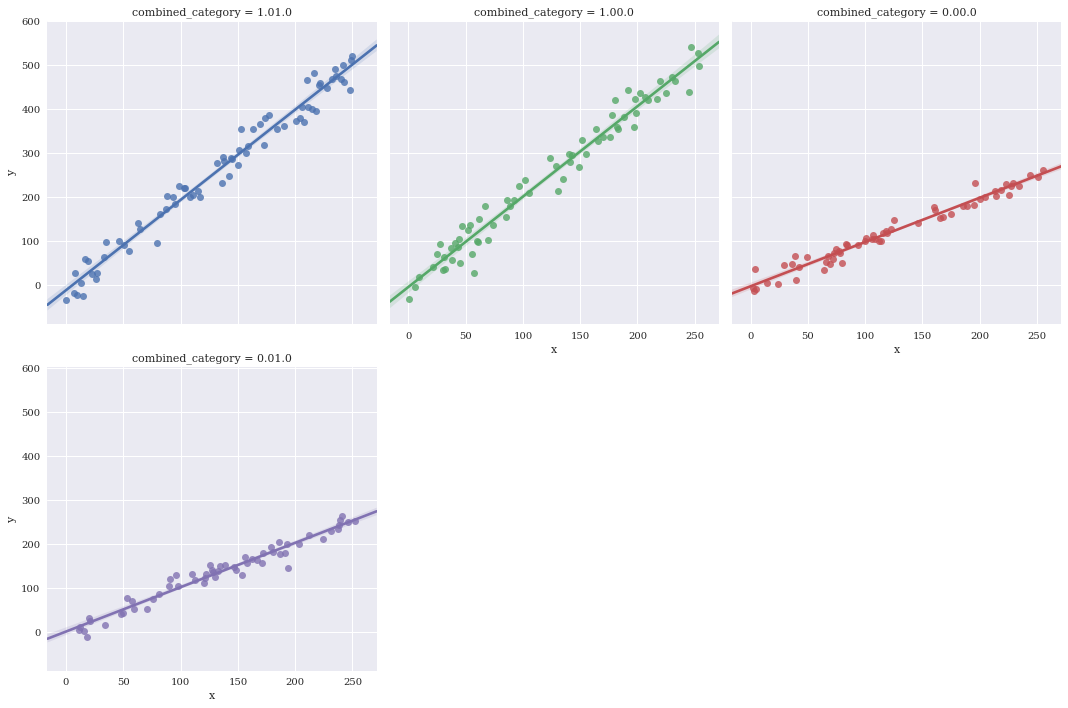

In [8]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='combined_category',
           col_wrap=3,
           col='combined_category')

Adjust height of facets with `size`

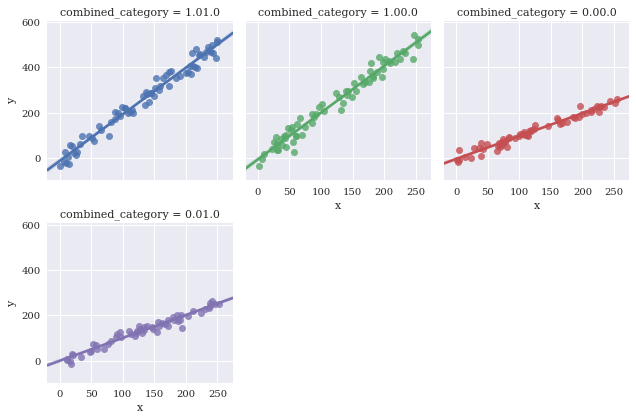

In [9]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='combined_category',
           col_wrap=3,
           col='combined_category',
           size = 3)

Adjust `aspect` ratio

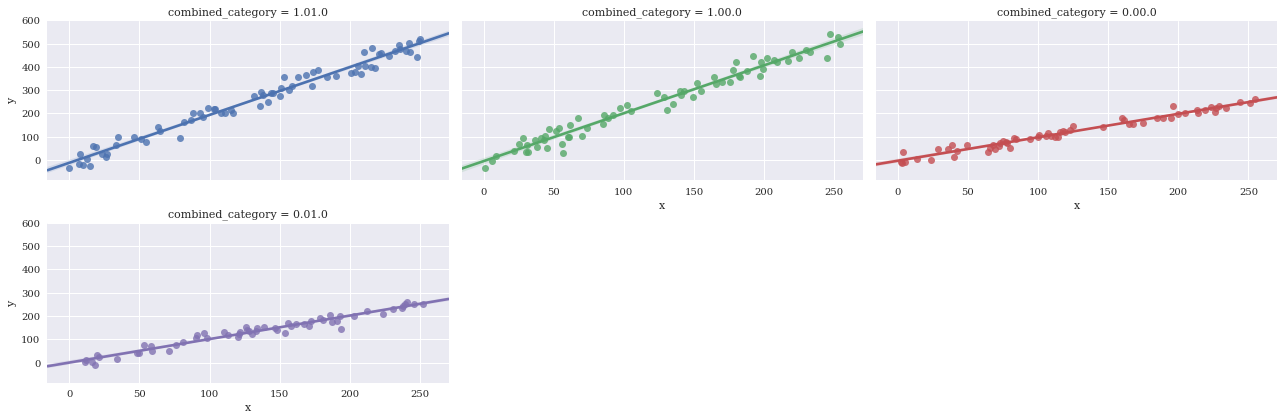

In [10]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='combined_category',
           col_wrap=3,
           col='combined_category',
           size = 3,
           aspect=2)

Reuse x/y axis labels with `sharex` and `sharey`

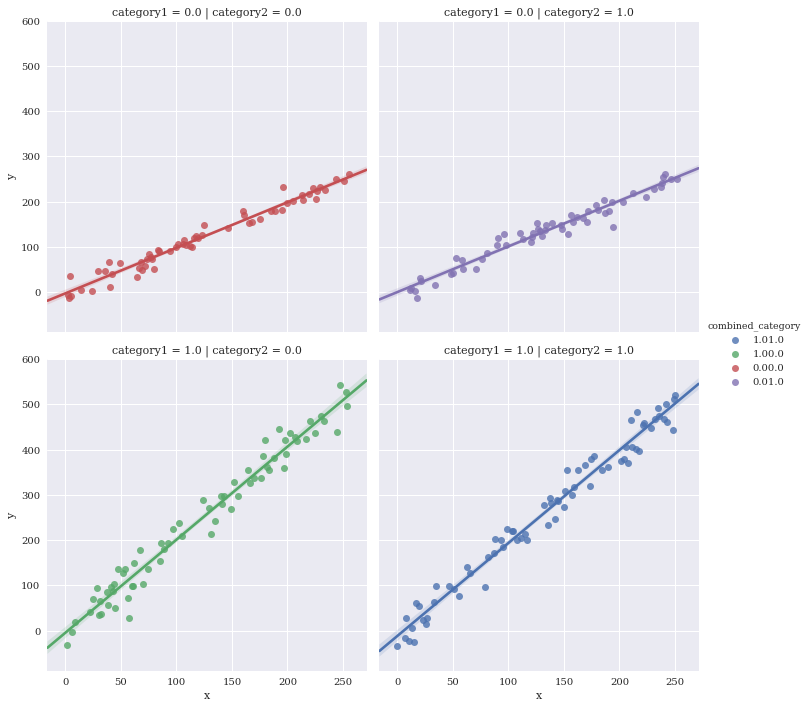

In [11]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='combined_category',
           row='category1',
           col='category2',
           sharex=True,
           sharey=True)

Adjust the `markers`. A full list of options can be found [here](https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html).

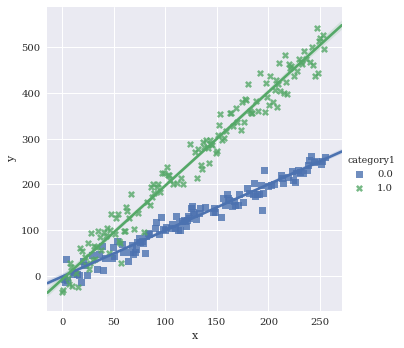

In [12]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='category1',
           markers=['s','X'])

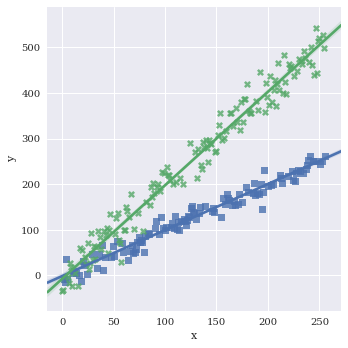

In [13]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='category1',
           markers=['s','X'],
           legend=False)

Pull legend inside plot with `legend_out=False`

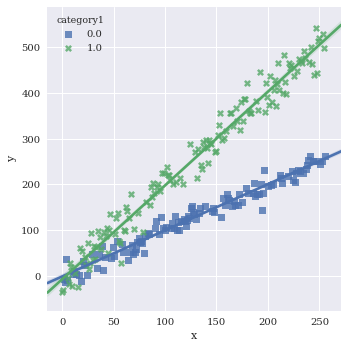

In [14]:
sns.lmplot(data=df,
           x='x',
           y='y',
           hue='category1',
           markers=['s','X'],
           legend_out=False)

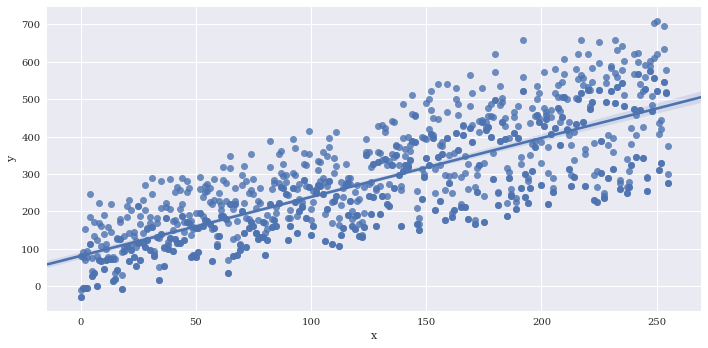

In [15]:
# Generate some repeated values of x with different y
df2 = df
for i in range(3):
    copydata = df
    copydata.y += 100*np.random.rand(df.shape[0])
    df2 = pd.concat((df2, copydata),axis=0)
sns.lmplot(data=df2,
           x='x',
           y='y',
           aspect=2)

Provide a summary function to `x_estimator`

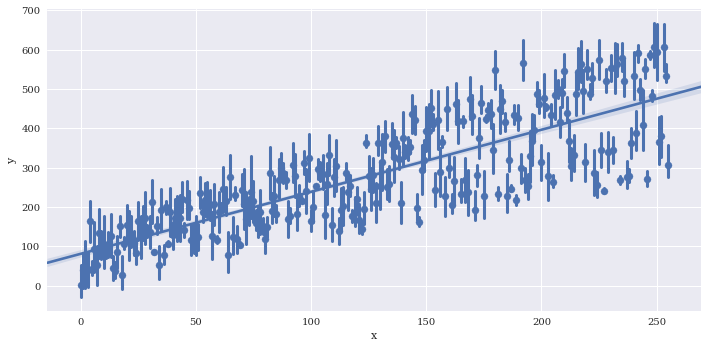

In [16]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           x_estimator = np.mean,
           aspect=2)

Reduce the size of the confidence intervals around the summarized values wiht `x_ci`, which is given as a percentage 0-100.

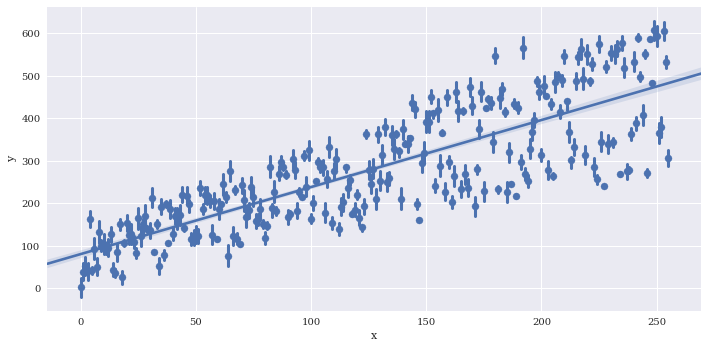

In [17]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           x_estimator = np.mean,
           aspect=2,
           x_ci=50)

Bin the data along x. The regression line is still fit to the full data

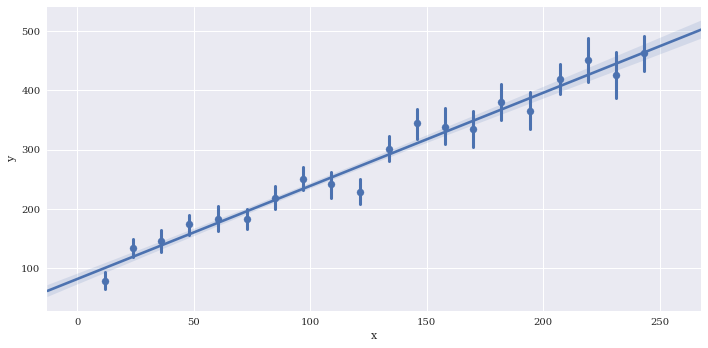

In [18]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           aspect=2,
           x_bins=20)

Disable plotting of scatterpoints with `scatter=False`

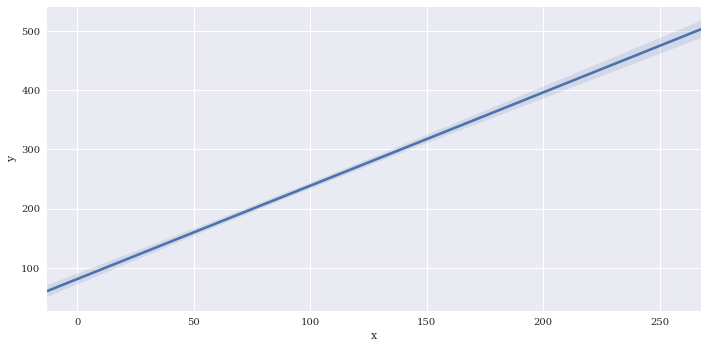

In [19]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           aspect=2,
           scatter=False)

Disable plotting of regression line with `fit_reg=False`

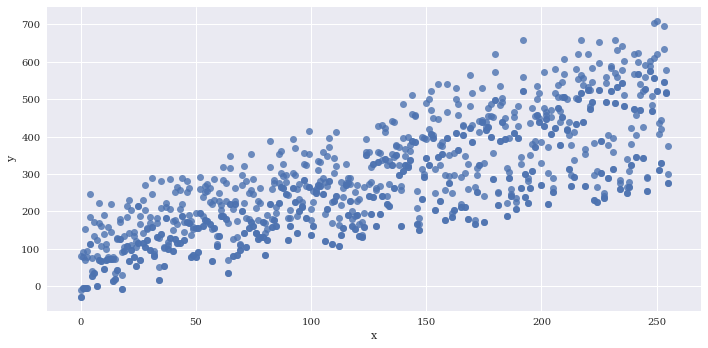

In [20]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           aspect=2,
           fit_reg=False)

Adjust the size of the confidence interval drawn around the regression line similar to `x_ci`. Here I'll disable it by setting to `None`

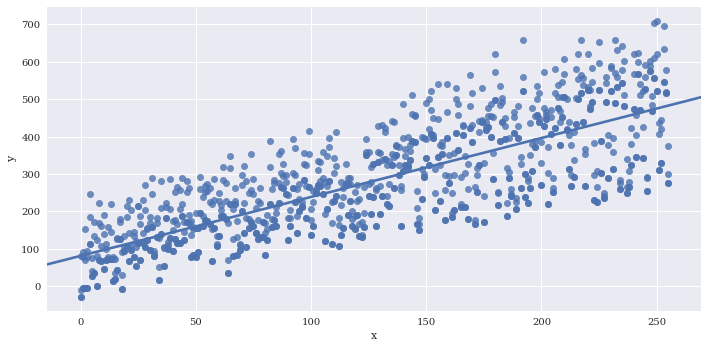

In [21]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           aspect=2,
           ci=None)

Estimate a higher `order` polynomial, I just chose a value of 5 to demonstrate, but you should be careful choosing this parameter to avoid overfitting.

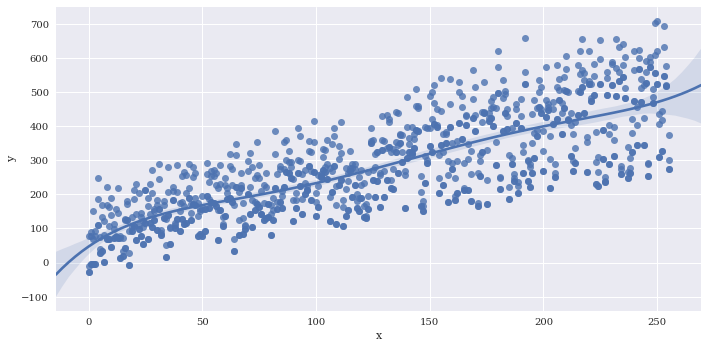

In [22]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           aspect=2,
           order=5)

Use [Lowess regression](https://en.wikipedia.org/wiki/Local_regression)

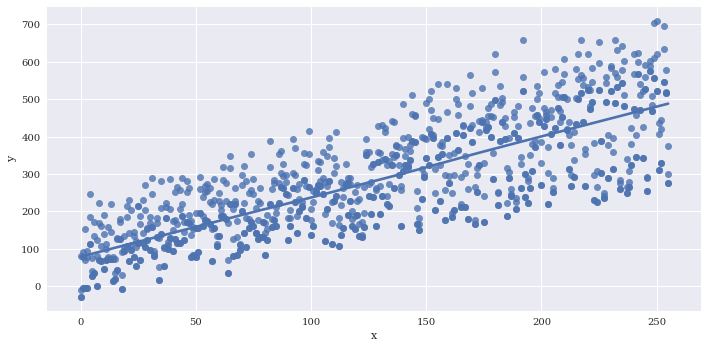

In [23]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           aspect=2,
           lowess=True)

Trim the regression line to match the bounds of the data with `truncate`

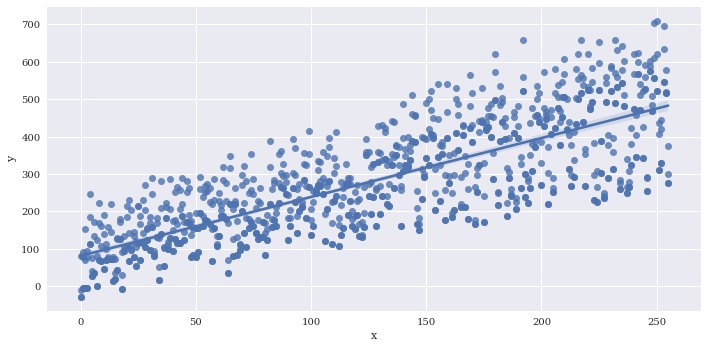

In [24]:
sns.lmplot(data=df2,
           x='x',
           y='y',
           aspect=2,
           truncate=True)

Perform logistic regression with `logistic = True`. This fits a line to the log-odds of a binary classification. I'll create a fake predictor to illustrate.

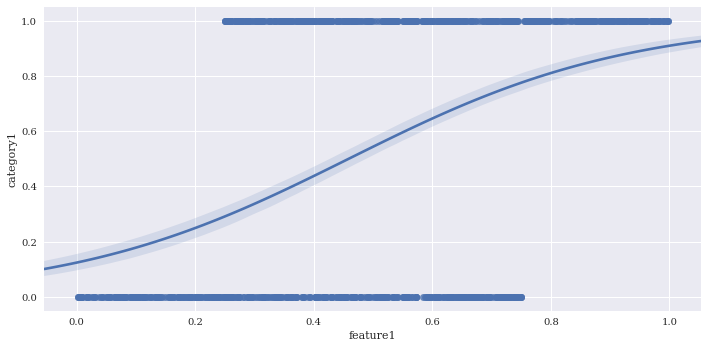

In [25]:
df2['feature1'] = 0.75*np.random.rand(df2.shape[0])
df2.loc[df2.category1 == 1, 'feature1'] = 0.25 + 0.75*np.random.rand(df2.loc[df2.category1 == 1].shape[0])
sns.lmplot(data=df2,
           x='feature1',
           y='category1',
           aspect=2,
           logistic=True)

Jitter can be added to make clusters of points easier to see with `x_jitter` and `y_jitter`. For this logistic regression all of the y points are either exactly 1 or 0, but the y_jitter adjusts the position where they are placed for visualization purposes.

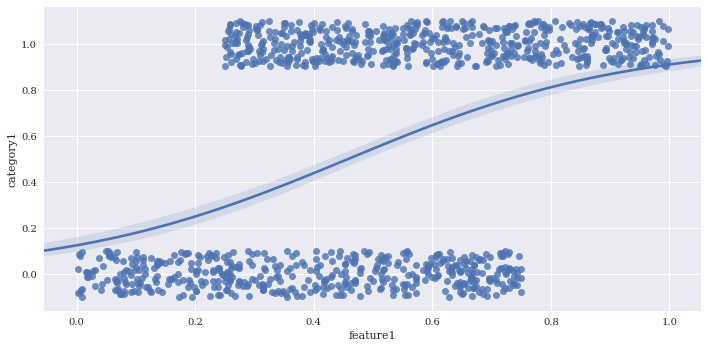

In [26]:
sns.lmplot(data=df2,
           x='feature1',
           y='category1',
           aspect=2,
           logistic=True,
           y_jitter=.1)

### Finalize 

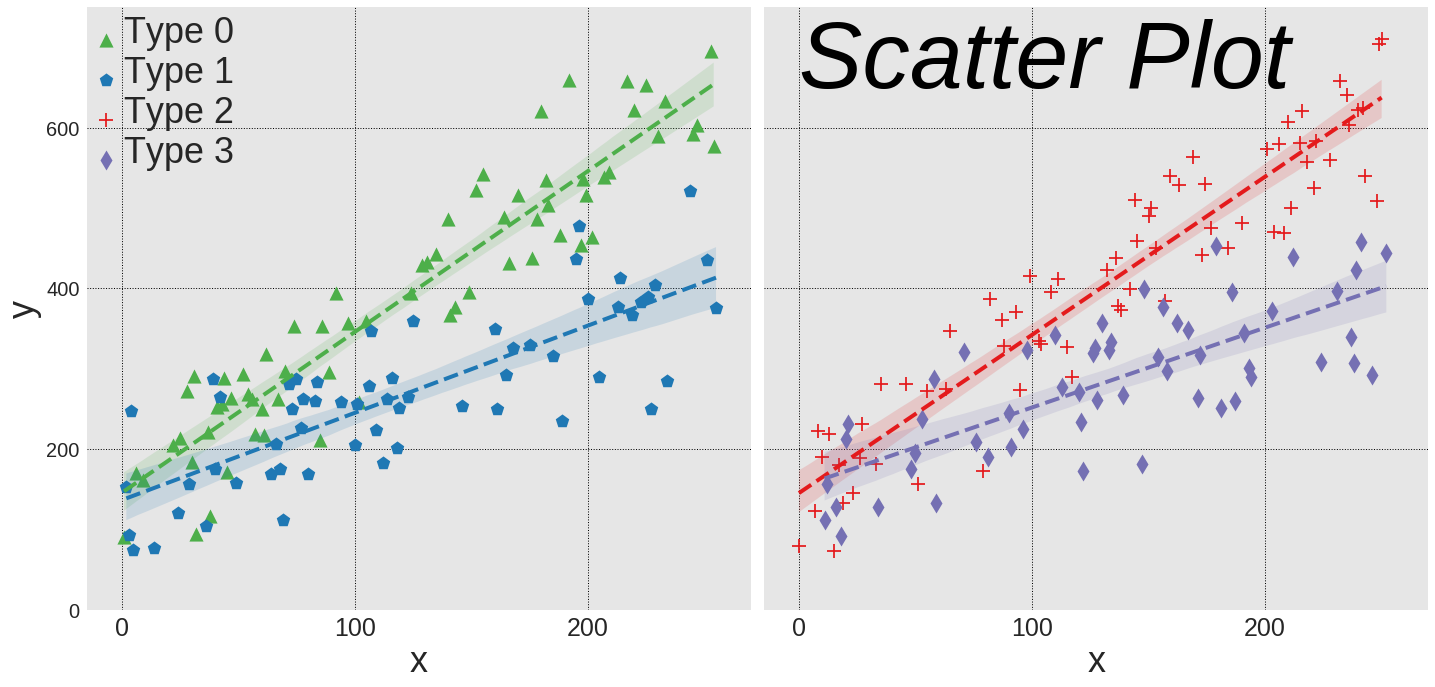

In [27]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            "grid.color":'black',
            "grid.linestyle":':',
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})
p = sns.lmplot(data=df,
           x='x',
           y='y',
           hue='combined_category',
           col='category2',
           size=10,
           sharey=True,
           legend_out=False,
           truncate=True,
           markers=['^','p','+','d'],
           palette=['#4daf4a','#1f78b4','#e41a1c','#7570b3'],
           hue_order = ['1.00.0', '0.00.0', '1.01.0','0.01.0'],
           scatter_kws={"s":200,'alpha':1},
           line_kws={"lw":4,
                     'ls':'--'})
leg = p.axes[0, 0].get_legend()
leg.set_title(None)
labs = leg.texts
labs[0].set_text("Type 0")
labs[1].set_text("Type 1")
labs[2].set_text("Type 2")
labs[3].set_text("Type 3")
for l in labs + [p.axes[0,0].xaxis.label, p.axes[0,0].yaxis.label, p.axes[0,1].xaxis.label, p.axes[0,1].yaxis.label]:
    l.set_fontsize(36)
p.axes[0, 0].set_title('')
p.axes[0, 1].set_title('')
plt.text(0,650, "Scatter Plot", fontsize = 95, color='black', fontstyle='italic')
p.axes[0,0].set_xticks(np.arange(0, 250, 100))
p.axes[0,0].set_yticks(np.arange(0, 700, 200))
p.axes[0,1].set_xticks(np.arange(0, 250, 100))
p.axes[0,1].set_yticks(np.arange(0, 700, 200))

In [29]:
p.savefig('../../figures/lmplot.png')